# Dependencies and files

## Install dependencies

## Imports

In [1]:
import cell2location

c:\Users\claptar\miniforge3\envs\c2lenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import squidpy as sq
import cell2location as c2l

import seaborn as sns
import os

import time
from tqdm.notebook import tqdm
import requests

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

ModuleNotFoundError: No module named 'squidpy'

# Global variables

In [2]:
layers = ['L1', 'L2', 'L3', 'L4', 'L5', "L6", 'WM']

In [3]:
cluster_color = ['red', 'yellow', 'orange', 'green', 'purple', 'blue', 'olive', 'pink', 'brown']

# Load files

## Load visium files

In [4]:
visium_dir_path = '../data/raw_adata/'

In [5]:
adata_human = sc.read_h5ad(visium_dir_path +  'human.h5ad')
adata_human.var['gene_names'] = adata_human.var.index
adata_human.var.set_index('gene_ids', drop=True, inplace=True)
adata_human.obs_names_make_unique()
adata_human

D:\Projects\spatialMPFC\venv\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 17633 × 19966
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id'
    var: 'feature_types', 'gene_names'
    uns: 'spatial'
    obsm: 'spatial'

## Load snRNA-seq data

In [6]:
snrnaseq_dir_path = '../data/snRNAseq_data/'

In [7]:
#adata_human_sc = sc.read_h5ad(snrnaseq_dir_path +  'velmeshev_subset.h5ad')

In [8]:
adata_human_sc = sc.read_mtx(snrnaseq_dir_path +  "matrix.mtx.gz")
adata_human_sc
#meta = pd.read_csv("meta.tsv", sep="\t")
#ad.var = meta

MemoryError: Unable to allocate 9.92 GiB for an array with shape (1332019322,) and data type int64

In [ ]:
1 + 1

In [39]:
adata_human_sc.X[0:15, 0:15].A

array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 2.9470956, 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       ],
       [1.0446132, 0.       , 2.124558 , 0.       , 1.0446132, 0.       ,
        1.0446132, 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       ],
       [0.       , 0.       , 2.6576407, 0.       

In [34]:
adata_human_sc.X.sum(axis=1)

matrix([[1125.449 ],
        [1111.0172],
        [1210.045 ],
        ...,
        [2339.8796],
        [2248.9016],
        [2588.0344]], dtype=float32)

## Load sample annotation

In [9]:
annotation = pd.read_excel('results/sample_annotation.xlsx', index_col=0)
annotation.head()

,dataset,individual,region,age,age_range,sex_original,region_broad,chemistry,PMI,sex,Nemo sample name
sample,,,,,,,,,,,
5387_BA9,Velmeshev,5387,BA9,12,10-20 years,Male,FC,V2,13,Male,5387_BA9
5163_BA24,Velmeshev,5163,BA24,14,10-20 years,Male,CC,V2,12,Male,5163_BA24
5958_BA24,Velmeshev,5958,BA24,22,Adult,Male,CC,V2,24,Male,5958_BA24
5577_BA9,Velmeshev,5577,BA9,21,Adult,Male,FC,V2,19,Male,5577_BA9
5958_BA9,Velmeshev,5958,BA9,22,Adult,Male,FC,V2,24,Male,5958_BA9


## Load normalized pseudobulks

In [10]:
pb_dir_path = '../data/pseudobulks/'

In [11]:
adata_pb_norm = sc.read_h5ad(pb_dir_path + 'pb_mammals_samplenorm_mean_filtered.h5ad')
#adata_pb_norm_mean.var = anova_res
adata_pb_norm

AnnData object with n_obs × n_vars = 89 × 5390
    obs: 'layer', 'sample_id', 'psbulk_n_cells', 'psbulk_counts', 'condition', 'lib_size', 'log_lib_size'
    var: 'feature_types', 'mt', 'hb', 'ribo'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'psbulk_props'

In [12]:
background_genes = adata_pb_norm.var_names.tolist()
len(background_genes)

5390

# Preprocess data

## Subset relevant samples

In [13]:
annotation.head()

,dataset,individual,region,age,age_range,sex_original,region_broad,chemistry,PMI,sex,Nemo sample name
sample,,,,,,,,,,,
5387_BA9,Velmeshev,5387,BA9,12,10-20 years,Male,FC,V2,13,Male,5387_BA9
5163_BA24,Velmeshev,5163,BA24,14,10-20 years,Male,CC,V2,12,Male,5163_BA24
5958_BA24,Velmeshev,5958,BA24,22,Adult,Male,CC,V2,24,Male,5958_BA24
5577_BA9,Velmeshev,5577,BA9,21,Adult,Male,FC,V2,19,Male,5577_BA9
5958_BA9,Velmeshev,5958,BA9,22,Adult,Male,FC,V2,24,Male,5958_BA9


In [14]:
region = 'PFC'
age_range = ['0-1 years', '3rd trimester', '2nd trimester']

In [15]:
# subset annotation
ann_subset = annotation[(annotation.region == region) & (annotation.age_range.isin(age_range))]
ann_subset.index = ann_subset.index.str.replace("-PFC", '').str.replace('_PFC', '')
ann_subset

,dataset,individual,region,age,age_range,sex_original,region_broad,chemistry,PMI,sex,Nemo sample name
sample,,,,,,,,,,,
GW27-2-7-18,Velmeshev,GW27-2-7-18,PFC,GW28.5,3rd trimester,Male,FC,V2,24,Male,GW27-PFC-2-7-18
GW20-11-28-18,Velmeshev,GW20-11-28-18,PFC,GW20.5,2nd trimester,Female,FC,V2,20,Female,GW20-PFC-11-28-18
GW20-12-7-18,Velmeshev,GW20-12-7-18,PFC,GW20,2nd trimester,Unknown,FC,V2,0,Female,GW20-PFC-12-7-18
GW25-11-17-17,Velmeshev,GW25-11-17-17,PFC,GW25,2nd trimester,Unknown,FC,V2,0,Male,GW25-PFC-11-17-17
GW30-11-6-18,Velmeshev,GW30-11-6-18,PFC,GW30,3rd trimester,Female,FC,V2,24,Female,GW30-PFC-11-6-18
GW16-2-2-20,Velmeshev,GW16-2-2-20,PFC,GW16,2nd trimester,Unknown,FC,V2,0,Male,GW16-2-2-20_PFC
GW18-6-14-19,Velmeshev,GW18-6-14-19,PFC,GW18,2nd trimester,Unknown,FC,V2,0,Male,GW18-6-14-19_PFC


In [16]:
# adata_human_sc = adata_human_sc[adata_human_sc.obs.donor_id.isin(ann_subset.index)].copy()
# adata_human_sc

In [17]:
# adata_human_sc.write(snrnaseq_dir_path +  'velmeshev_subset.h5ad')

## Subset the same genes

In [79]:
# filter MT genes
shared_genes = adata_human.var[~adata_human.var.gene_names.str.startswith("MT-")].index

In [80]:
# shared genes
shared_genes = shared_genes.intersection(adata_human_sc.var_names)
shared_genes

Index(['F3', 'F5', 'F11', 'C9', 'C7', 'C6', 'F12', 'C2', 'F9', 'F8', 'F2',
       'OR5BS1P', 'F7', 'F10', 'C3'],
      dtype='object')

In [76]:
adata_human_sc.var

""
index
Xkr4
Gm1992
Gm37381
Rp1
Sox17
...
Ins1
AC133103.5
AC165294.2


In [51]:
# subset for snRNAseq
adata_human_sc = adata_human_sc[:, shared_genes]
adata_human_sc

View of AnnData object with n_obs × n_vars = 104610 × 16370
    obs: 'organism_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type'
    var: 'features'
    uns: 'batch_condition', 'default_embedding', 'schema_version', 'title', 'cell_type_ontology_term_id_colors', 'cell_type_colors', 'donor_id_colors'
    obsm: 'X_pca', 'X_umap'

In [52]:
# subset for visium
adata_human = adata_human[:, shared_genes]
adata_human

View of AnnData object with n_obs × n_vars = 17633 × 16370
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id'
    var: 'feature_types', 'gene_names'
    uns: 'spatial'
    obsm: 'spatial'

## Let's look at the samples

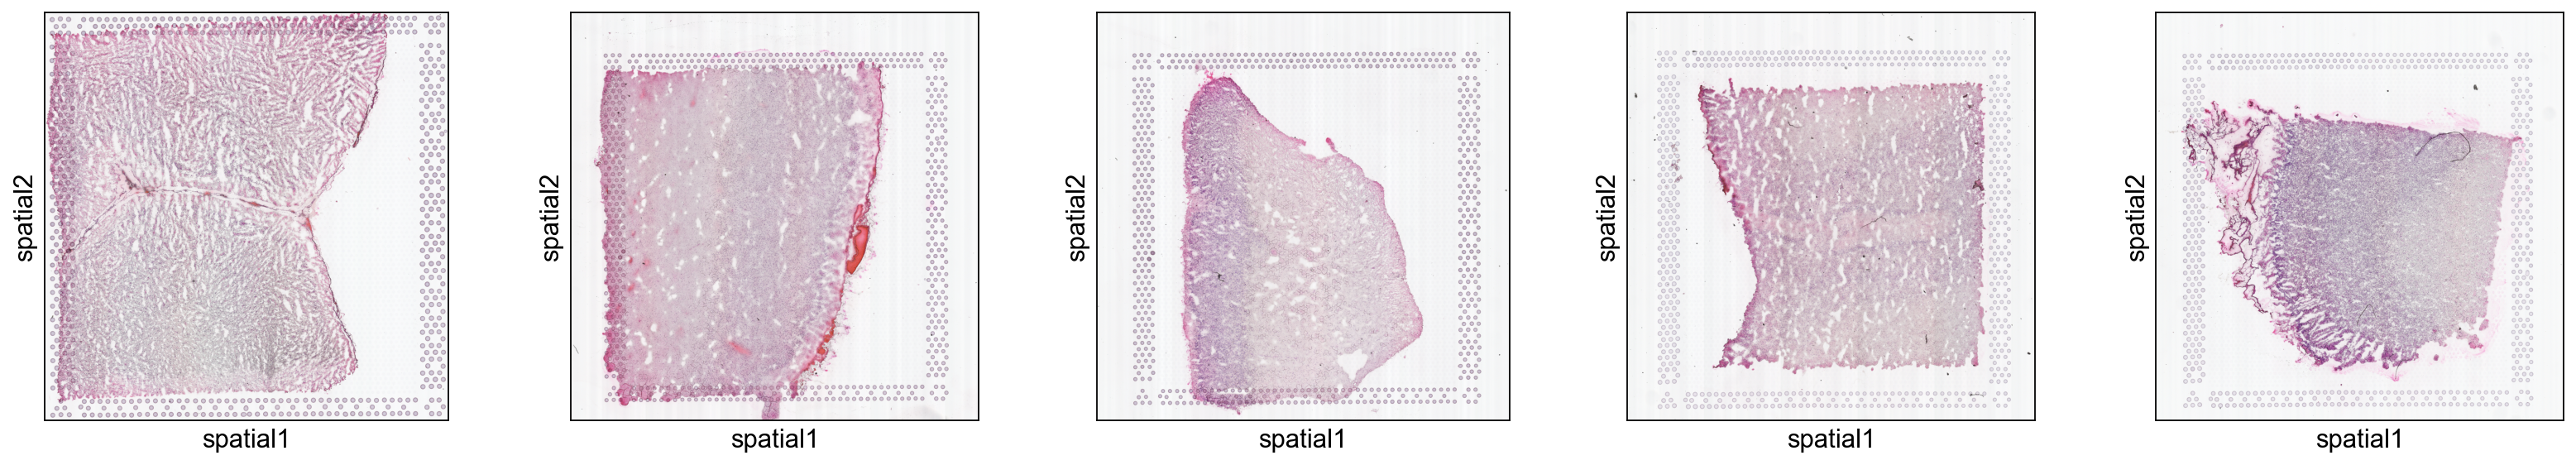

In [30]:
sq.pl.spatial_scatter(adata_human, library_key="sample_id", ncols=5)

In [36]:
cell_type_dict = {
    'CL:0002319': 'neural cell',
    'CL:0000127': 'astrocyte',
    'CL:0002453': 'oligodendrocyte precursor cell',
    'CL:0000129': 'microglial cell',
    'CL:0000000': 'cell'
}

In [38]:
adata_human_sc.obs['cell_type'] = adata_human_sc.obs.cell_type_ontology_term_id.replace(cell_type_dict)

D:\Projects\spatialMPFC\venv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
D:\Projects\spatialMPFC\venv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


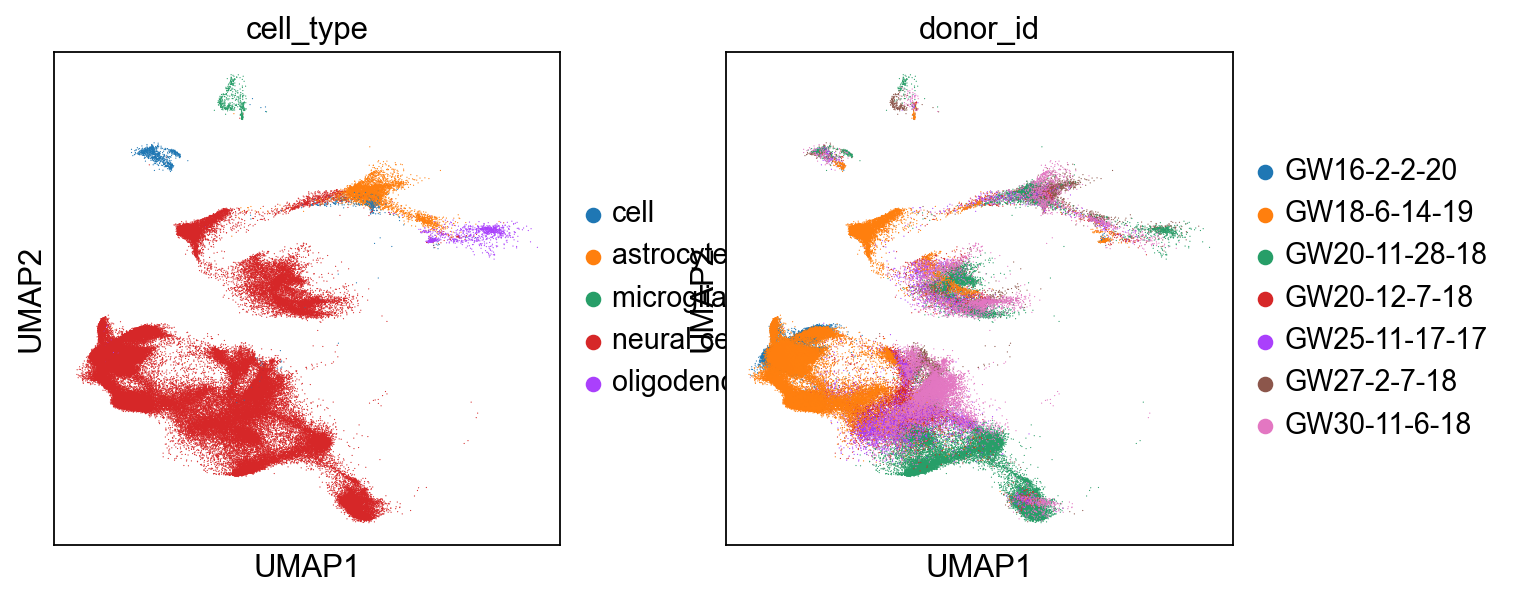

In [41]:
sc.pl.umap(adata_human_sc, color=["cell_type", 'donor_id'])

# Deconvolution

## Fitting the reference model

D:\Projects\spatialMPFC\venv\lib\site-packages\cell2location\utils\filtering.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = np.array((adata.X > 0).sum(0)).flatten()
D:\Projects\spatialMPFC\venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


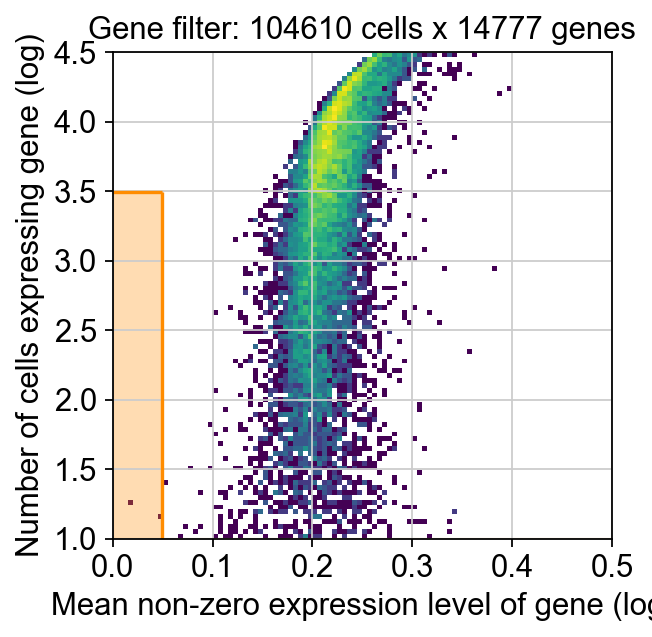

In [53]:
selected = c2l.utils.filtering.filter_genes(
    adata_human_sc, cell_count_cutoff=5, cell_percentage_cutoff2=0.03, nonz_mean_cutoff=1.12
)

In [66]:
adata_human_sc.X.sum(axis=1)

matrix([[1080.37029418],
        [1084.82127511],
        [1165.45782458],
        ...,
        [2287.89766921],
        [2206.78604418],
        [2508.26935134]])

In [54]:
adata_human_sc = adata_human_sc[:, selected].copy()
adata_human = adata_human[:, selected].copy()

In [60]:
c2l.models.RegressionModel.setup_anndata(
    adata=adata_human_sc,
    batch_key="donor_id",
    labels_key="cell_type"
)

D:\Projects\spatialMPFC\venv\lib\site-packages\scvi\data\fields\_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [61]:
model = c2l.models.RegressionModel(adata_human_sc)
# default, try on GPU:
use_gpu = False
model.train(max_epochs=250, batch_size=2500, train_size=1, lr=0.002, use_gpu=use_gpu)

D:\Projects\spatialMPFC\venv\lib\site-packages\scvi\train\_trainrunner.py:76: UserWarning: `use_gpu` is deprecated in v1.0 and will be removed in v1.1. Please use `accelerator` and `devices` instead.
  accelerator, lightning_devices, device = parse_device_args(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
D:\Projects\spatialMPFC\venv\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:69: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.


Epoch 1/250:   0%|                                                 | 0/250 [00:00<?, ?it/s]

ValueError: Error while computing log_prob at site 'data_target':
Expected value argument (Tensor of shape (2500, 14777)) to be within the support (IntegerGreaterThan(lower_bound=0)) of the distribution GammaPoisson(), but found invalid values:
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 2.0007, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 2.2490],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 2.1979]])
                Trace Shapes:                     
                 Param Sites:                     
                Sample Sites:                     
       per_cluster_mu_fg dist            | 5 14777
                        value            | 5 14777
                     log_prob            |        
      detection_mean_y_e dist            | 7     1
                        value            | 7     1
                     log_prob            |        
  s_g_gene_add_alpha_hyp dist    1     1 |        
                        value    1     1 |        
                     log_prob    1     1 |        
       s_g_gene_add_mean dist            | 7     1
                        value            | 7     1
                     log_prob            |        
s_g_gene_add_alpha_e_inv dist            | 7     1
                        value            | 7     1
                     log_prob            |        
            s_g_gene_add dist            | 7 14777
                        value            | 7 14777
                     log_prob            |        
         alpha_g_phi_hyp dist    1     1 |        
                        value    1     1 |        
                     log_prob    1     1 |        
         alpha_g_inverse dist            | 1 14777
                        value            | 1 14777
                     log_prob            |        
             data_target dist 2500 14777 |        
                        value 2500 14777 |        